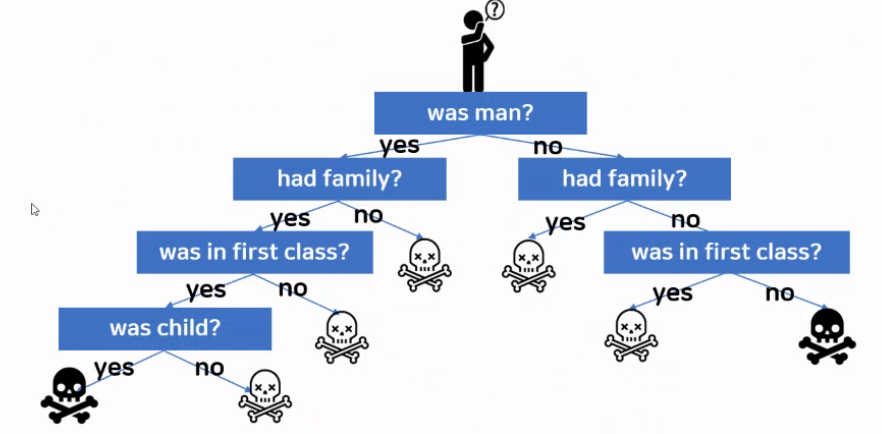
- 의사결정 트리 모델


In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('data/train.csv', encoding = 'euc-kr')
test = pd.read_csv('data/test.csv', encoding = 'euc-kr')

In [2]:
train['Sex'] = train['Sex'].map({'female': 0, 'male':1})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C':1, 'Q' : 2})
test['Sex'] = test['Sex'].map({'female': 0, 'male':1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C':1, 'Q' : 2})

In [3]:
del train['Name']
del test['Name']
del train['PassengerId']
del test['PassengerId']
del train['Cabin']
del test['Cabin']
del train['Age']
del test['Age']

In [4]:
train = train[(train['Embarked'].notnull()) & (train['Fare'].notnull())]
pd.set_option('display.max_rows',None)
train['Ticket'] = [i.split()[-1] for i in train['Ticket']]
train = train[train['Ticket'] != 'LINE']
train['Ticket'] = [int(i) for i in train['Ticket']]
test['Ticket'] = [int(i.split()[-1]) for i in test['Ticket']]
train,test

(     Survived  Pclass  Sex  SibSp  Parch   Ticket      Fare  Embarked
 0           0       3    1      1      0    21171    7.2500       0.0
 1           1       1    0      1      0    17599   71.2833       1.0
 2           1       3    0      0      0  3101282    7.9250       0.0
 3           1       1    0      1      0   113803   53.1000       0.0
 4           0       3    1      0      0   373450    8.0500       0.0
 5           0       3    1      0      0   330877    8.4583       2.0
 6           0       1    1      0      0    17463   51.8625       0.0
 7           0       3    1      3      1   349909   21.0750       0.0
 8           1       3    0      0      2   347742   11.1333       0.0
 9           1       2    0      1      0   237736   30.0708       1.0
 10          1       3    0      1      1     9549   16.7000       0.0
 11          1       1    0      0      0   113783   26.5500       0.0
 12          0       3    1      0      0     2151    8.0500       0.0
 13   

In [5]:
train.corr()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked
Survived,1.000000,-0.335705,-0.542402,-0.034711,0.082770,-0.095778,0.255234,0.108258
Pclass,-0.335705,1.000000,0.125344,0.083599,0.018632,0.286102,-0.547142,0.046064
Sex,-0.542402,0.125344,1.000000,-0.114968,-0.246358,0.076637,-0.178196,-0.116928
SibSp,-0.034711,0.083599,-0.114968,1.000000,0.413945,0.045731,0.159731,-0.061907
Parch,0.082770,0.018632,-0.246358,0.413945,1.000000,-0.033843,0.216461,-0.080641
Ticket,-0.095778,0.286102,0.076637,0.045731,-0.033843,1.000000,-0.156484,-0.123345
Fare,0.255234,-0.547142,-0.178196,0.159731,0.216461,-0.156484,1.000000,0.061902
Embarked,0.108258,0.046064,-0.116928,-0.061907,-0.080641,-0.123345,0.061902,1.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  885 non-null    int64  
 1   Pclass    885 non-null    int64  
 2   Sex       885 non-null    int64  
 3   SibSp     885 non-null    int64  
 4   Parch     885 non-null    int64  
 5   Ticket    885 non-null    int64  
 6   Fare      885 non-null    float64
 7   Embarked  885 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 62.2 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Ticket    418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [8]:
print(train.describe())

         Survived      Pclass         Sex       SibSp       Parch  \
count  885.000000  885.000000  885.000000  885.000000  885.000000   
mean     0.383051    2.308475    0.647458    0.526554    0.384181   
std      0.486405    0.835298    0.478032    1.105634    0.808173   
min      0.000000    1.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000    8.000000    6.000000   

             Ticket        Fare    Embarked  
count  8.850000e+02  885.000000  885.000000  
mean   2.987459e+05   32.241751    0.363842  
std    6.582991e+05   49.762788    0.637127  
min    3.000000e+00    0.000000    0.000000  
25%    1.487900e+04    7.925000    0.000000  
50%    1.120590e+05   14.454200    0.000000  
75%    3.470820e+05   31.000000    1.000000  
max    3.1

In [9]:
print(test.describe())

           Pclass         Sex       SibSp       Parch        Ticket  \
count  418.000000  418.000000  418.000000  418.000000  4.180000e+02   
mean     2.265550    0.636364    0.447368    0.392344  2.534044e+05   
std      0.841838    0.481622    0.896760    0.981429  5.876873e+05   
min      1.000000    0.000000    0.000000    0.000000  2.000000e+00   
25%      1.000000    0.000000    0.000000    0.000000  1.350800e+04   
50%      3.000000    1.000000    0.000000    0.000000  3.560950e+04   
75%      3.000000    1.000000    1.000000    0.000000  3.455002e+05   
max      3.000000    1.000000    8.000000    9.000000  3.101315e+06   

             Fare    Embarked  
count  417.000000  418.000000  
mean    35.627188    0.464115  
std     55.907576    0.685516  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.500000    1.000000  
max    512.329200    2.000000  


In [28]:
X = train.loc[:, ['Pclass','Sex','Embarked']]
y = train.iloc[:,6:7]
A = test.loc[:, ['Pclass','Sex','Fare','Embarked']]
A = A[A['Fare'].isnull()]
del A['Fare']
y

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
5,8.4583
6,51.8625
7,21.0750
8,11.1333
9,30.0708


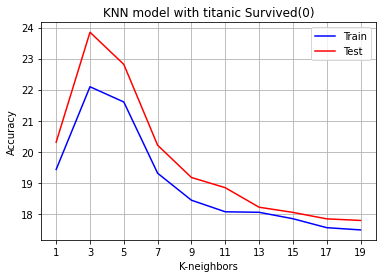

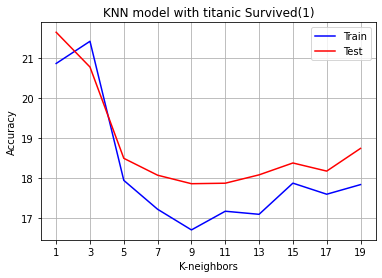

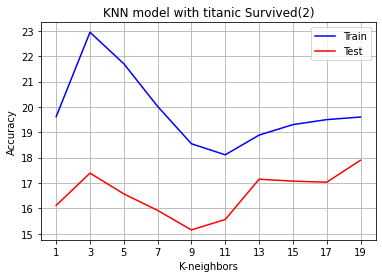

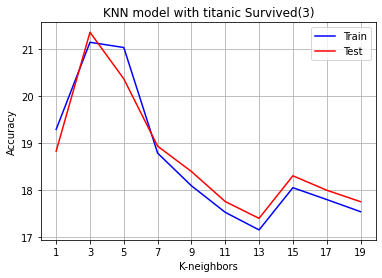

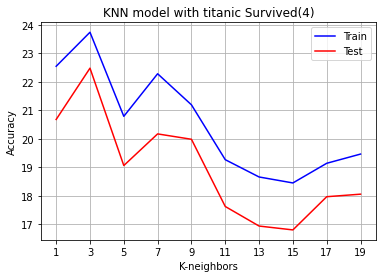

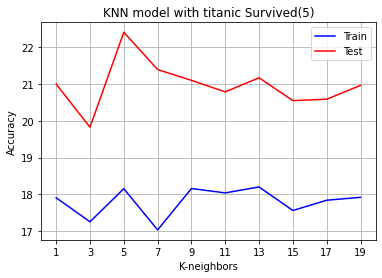

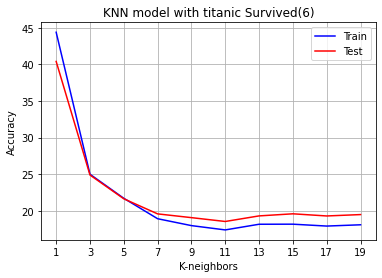

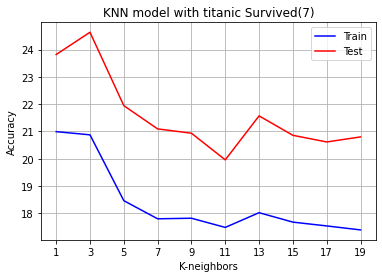

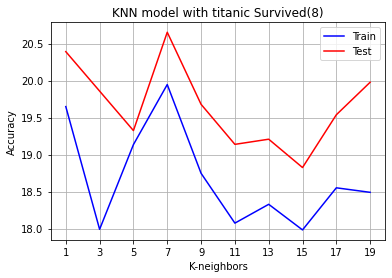

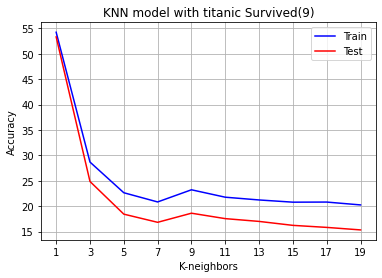

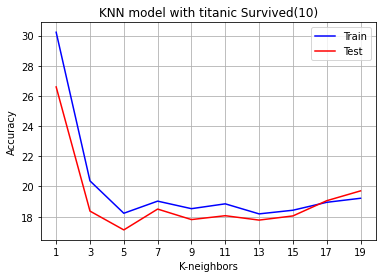

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


for i in range(11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i)
    train_acc= []
    test_acc = []

    neighbor = range(1, 20, 2)
    for j in neighbor :
        knn_model = KNeighborsRegressor(n_neighbors = j)
        knn_model.fit(X_train, y_train)
        pred_train = knn_model.predict(X_train)
        pred_test = knn_model.predict(X_test)
        mae_train = mean_absolute_error(pred_train,y_train)
        mae_test = mean_absolute_error(pred_test, y_test)
        train_acc.append(mae_train)
        test_acc.append(mae_test)

    plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
    plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
    plt.xticks(neighbor, labels = neighbor)
    plt.xlabel('K-neighbors')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'upper right')
    plt.grid()
    plt.title(f'KNN model with titanic Survived({i})')
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)


neighbor = range(1, 20, 2)

knn_model = KNeighborsRegressor(n_neighbors = 13)
knn_model.fit(X_train, y_train)
pred_train = knn_model.predict(X_train)
pred_test = knn_model.predict(X_test)

In [ ]:
X = train.iloc[:, 1:6]
y = train.iloc[:,6:7]
A = test.iloc[:, 0:5]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 6)
train_acc= []
test_acc = []

neighbor = range(1, 20, 2)
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_model.predict(X_test)

plt.plot(neighbor, train_acc, c = 'b', label = 'Train')
plt.plot(neighbor, test_acc, c = 'r', label = 'Test')
plt.xticks(neighbor, labels = neighbor)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper right')
plt.grid()
plt.title(f'KNN model with titanic Survived({i})')
plt.show()